In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from msc_filtering import MyKalmanFilterUnivariate, MyKalmanFilterMultivariate

## Some theory

#### Standard kalman filter

The discrete state-space process model defines the evolution of the state from time k−1 to time k  as:

$x_k=Fx_{k−1}+Bu_{k−1}+w_{k−1}$

$x$: state vector <br> 
$F$: state transition matrix <br> 
$u$: control vector <br> 
$B$: control-input matrix <br> 
$w$: process noise vector $w \sim N(0,Q)$ 

The measurement/observation model describes the relationship between the state and the measurement at the current time step $k$

$z_k=Hx_{k}+{\upsilon}_k$


$z$: measurement vector <br> 
$H$: measurement matrix <br> 
$\upsilon$: measurement noise vector $\upsilon \sim N(0,R)$ 

$F$ is a discretised process which can be found from a continous linear first order state space model using the infinite sum. If you take a differential equation and discretize it in order to solve it numerically you will end up with a difference equations (difference between two consecutive values - can use to create a corresponding recursive equation) 

$\dot{x} = A \cdot x $

Using:
$e^x= 1 + \sum_{i=1}^{\infty}\frac{x^i}{i!} $

$F_t = e^{{\Delta}tA} = I + \sum_{i=1}^{\infty}\frac{{\Delta}t^iA^i}{i!} $ Where $I$ is the identity

#### Extended Kalman filter

For a nonlinear dynamic system - one is not able to define either or both the process model or measurement model with multiplication of vectors and matrices. In an EKF we linearize the models about a current estimate using a Taylor series.

## Test Kalman filtering

####  Constant with constant model

Water tank with constant level at L=1

Define kalman filter params

In [2]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - Init high since unknown
Q = 0.0001  # System noise
R = 0.1  # Measurement noise

Instantiate filter

In [3]:
testFilter_const = MyKalmanFilterUnivariate(x0, p0, R, Q)

Evaluate against synthetic data

In [4]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.9, 0.8, 1.1, 1, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]
for measure in measure_list:
    testFilter_const.step(measure);
    xt_intr_list.append(testFilter_const.xt_intr)
    Pt_intr_list.append(testFilter_const.Pt_intr)
    k_gain_list.append(testFilter_const.k_gain)
    xt_curr_list.append(testFilter_const.xt_curr)
    Pt_curr_list.append(testFilter_const.Pt_curr)

Check results

In [5]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [6]:
df_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1000.000100,0.999900,0.899910,0.099990
1,0.899910,0.100090,0.500225,0.849933,0.050022
2,0.849933,0.050122,0.333877,0.933424,0.033388
3,0.933424,0.033488,0.250867,0.950126,0.025087
4,0.950126,0.025187,0.201193,0.950101,0.020119
5,0.950101,0.020219,0.168187,0.966902,0.016819
6,0.966902,0.016919,0.144705,1.000633,0.014470
7,1.000633,0.014570,0.127175,0.987835,0.012717
8,0.987835,0.012817,0.113613,0.972175,0.011361
9,0.972175,0.011461,0.102827,0.990460,0.010283


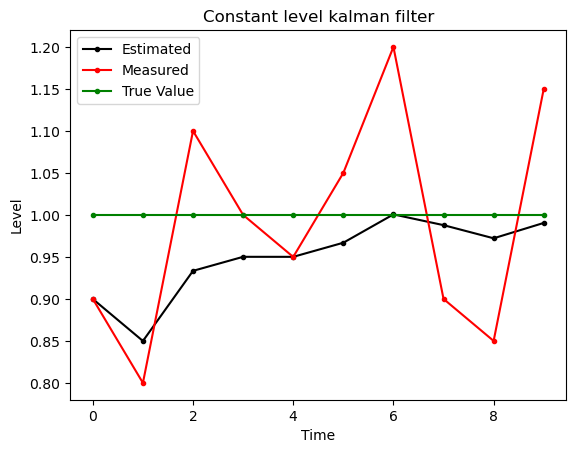

In [7]:
plt.plot(df_level.index, df_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_level.index, measure_list ,marker=".",color="red")
plt.plot(df_level.index, np.ones(len(df_level.index)) ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

#### Constant increasing with constant model

Water tank with constant filling at 0.1

In [8]:
rising_level = 0
gt_level = []

steps = 6
for _ in range(steps):
    rising_level = rising_level + 0.1
    gt_level.append(rising_level)

In [9]:
gt_level

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6]

Define kalman filter params

In [10]:
x0 = 0  # Initial value - arbitrary guess
p0 = 1000  # State covariances (Error of estimation) - High since unknown
Q = 0.001  # System noise
R = 0.1  # Measurement noise

Instantiate filter

In [11]:
testFilter_rising = MyKalmanFilterUnivariate(x0, p0, R, Q)

Evaluate against synthetic data

In [12]:
%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.11, 0.29, 0.32, 0.5, 0.58, 0.54]
for measure in measure_list:
    testFilter_rising.step(measure);
    
    # Record time steps    
    xt_intr_list.append(testFilter_rising.xt_intr)
    Pt_intr_list.append(testFilter_rising.Pt_intr)
    k_gain_list.append(testFilter_rising.k_gain)
    xt_curr_list.append(testFilter_rising.xt_curr)
    Pt_curr_list.append(testFilter_rising.Pt_curr)

Check results

In [13]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_rising_level = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [14]:
df_rising_level

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,0.000000,1000.001000,0.999900,0.109989,0.099990
1,0.109989,0.100990,0.502463,0.200438,0.050246
2,0.200438,0.051246,0.338827,0.240949,0.033883
3,0.240949,0.034883,0.258615,0.307943,0.025861
4,0.307943,0.026861,0.211739,0.365548,0.021174
5,0.365548,0.022174,0.181494,0.397210,0.018149


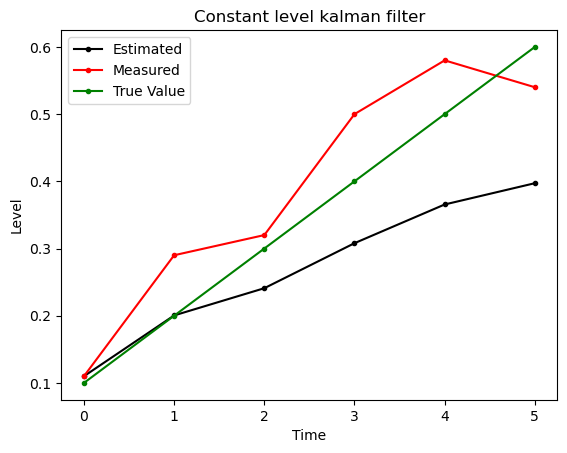

In [15]:
plt.plot(df_rising_level.index, df_rising_level['xt_curr'] ,marker=".",color="black")
plt.plot(df_rising_level.index, measure_list ,marker=".",color="red")
plt.plot(df_rising_level.index, gt_level ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

#### Constant increasing with constant increasing model

Using a sampling rate of $\Delta t= 1$

In [16]:
X0 = np.array([0,0])  # Level, Filling rate
P0 = np.array([[1000,0],[0, 1000]])  # Assume no correlation between states
F = np.array([[1, 1], [0, 1]])
r = 0.3
q = 0.00001
Q = np.array([[q/3,q/2],[q/2,q]])
H = np.array([1, 0])

In [17]:
testFilter_filling = MyKalmanFilterMultivariate(X0, P0, r, Q, F, H)

In [18]:
#%%capture
xt_intr_list = []
Pt_intr_list = []
k_gain_list = []
xt_curr_list = []
Pt_curr_list = []

measure_list = [0.3, 0.45, 0.2, 0.48, 0.75, 0.6]
for measure in measure_list:
    testFilter_filling.step(measure);
    
    # Record time steps    
    xt_intr_list.append(testFilter_filling.xt_intr)
    Pt_intr_list.append(testFilter_filling.Pt_intr)
    k_gain_list.append(testFilter_filling.k_gain)
    xt_curr_list.append(testFilter_filling.xt_curr)
    Pt_curr_list.append(testFilter_filling.Pt_curr)

In [19]:
list_of_lists = [xt_intr_list,Pt_intr_list,k_gain_list,xt_curr_list,Pt_curr_list]
df_filling = pd.DataFrame(list(zip(*list_of_lists)), columns= ['xt_intr','Pt_intr','k_gain','xt_curr','Pt_curr'])

In [20]:
df_filling

,xt_intr,Pt_intr,k_gain,xt_curr,Pt_curr
0,"[0, 0]","[[2000.0000033333333, 1000.000005], [1000.0000...","[0.9998500224968755, 0.4999250129148544]","[0.2999550067490626, 0.14997750387445632]","[[0.2999550067489447, 0.14997750387439737], [0..."
1,"[0.4499325106235189, 0.14997750387445632]","[[0.7498908524553577, 0.29996000849868226], [0...","[0.7142560111859283, 0.2857058977103878]","[0.44998071531636175, 0.14999678598734978]","[[0.21427680335577842, 0.08571176931311632], [..."
2,"[0.5999775013037115, 0.14999678598734978]","[[0.4285617031589566, 0.1285747971567285], [0....","[0.5882297975597183, 0.17647756751314753]","[0.36469881668338733, 0.07940972949728398]","[[0.1764689392679155, 0.052943270253944255], [..."
3,"[0.4441085461806713, 0.07940972949728398]","[[0.3000105896125172, 0.07060004675732409], [0...","[0.5000088245213505, 0.11766466789014028]","[0.46205458981523617, 0.0836328854910296]","[[0.15000264735640517, 0.035299400367042086], ..."
4,"[0.5456874753062657, 0.0836328854910296]","[[0.22943551381878877, 0.04413513276200815], [...","[0.4333587525398197, 0.08336262228361659]","[0.6342280961358036, 0.10066491331488545]","[[0.1300076257619459, 0.025008786685084973], [..."
5,"[0.734893009450689, 0.10066491331488545]","[[0.18503805609819438, 0.030023310317830176], ...","[0.3814918309435374, 0.061898875645650484]","[0.6834324282938617, 0.09231518769742969]","[[0.11444754928306122, 0.018569662693695147], ..."


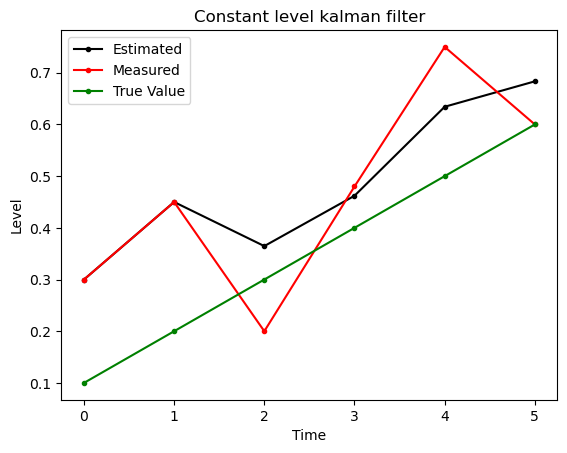

In [21]:
plt.plot(df_filling.index, np.stack((df_filling['xt_curr'].to_numpy()).tolist(), axis=0)[:,0],marker=".",color="black")
plt.plot(df_filling.index, measure_list ,marker=".",color="red")
plt.plot(df_filling.index, gt_level ,marker=".",color="g")
plt.title("Constant level kalman filter")
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["Estimated","Measured","True Value"],loc='upper left')
plt.show()

When P is initialised high - the measurements are used rather then the initial values